In [38]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

def get_date(created):
    import datetime as dt
    return dt.datetime.fromtimestamp(created)

In [27]:
# read data
df_depression = pd.read_csv('./Data/depression_submission_update.csv')
df_suicide = pd.read_csv('./Data/suicide_submission_update.csv')
df_confession = pd.read_csv('./Data/confession_submission_update.csv')

# put columns 'subreedit'
df_depression['subreddit'] = 'depression'
df_suicide['subreddit'] = 'suicide watch'
df_confession['subreddit'] = 'confession'

# append to the dataframe
df = df_depression.append(df_suicide)
df = df.append(df_confession)
df.reset_index(drop = True, inplace = True)

# remove sticky false
idsticky = df[df.stickied == True].index
df.drop(idsticky, inplace = True)

# initiate variables
iddrop = []
length = []

# for loop to check the word count and filter off the length
for id, sentences in enumerate(df.selftext):
    word_list = str(sentences).split()
    word_count = len(word_list)
    length.append(word_count)
    if (word_count <= 10) | (word_count >= 250) :
        iddrop.append(id)        
df['word_count_before'] = length
df.drop(iddrop, inplace = True)

# change the created_utc into datetime and assign to columns post_date
df = df.assign(postdate = df['created_utc'].apply(get_date))

# drop duplicates from author
# sort the df by the dates and reset the index
df.sort_values(by = 'postdate', ascending = True, inplace = True)
df.reset_index(drop = True, inplace = True)
df_drop = df.drop_duplicates(subset = ['author'], keep = 'first')

In [32]:
print("length of the dataframe:", len(df_drop))
print("unique id counts:", df_drop.author.nunique())

length of the dataframe: 12494
unique id counts: 12494


In [46]:
# randomise the length of data 
df_output = df_drop.sample(frac=1)

# output into csv
df_output[['author', 'postdate', 'subreddit', 'full_link', 'title', 'selftext', 'word_count_before']].to_csv('./Output/data_preprocessed.csv')

count    16036.000000
mean       100.556810
std         63.219883
min         11.000000
25%         47.000000
50%         88.000000
75%        146.000000
max        249.000000
Name: word_count_before, dtype: float64

suicide watch    6869
depression       6701
confession       2466
Name: subreddit, dtype: int64

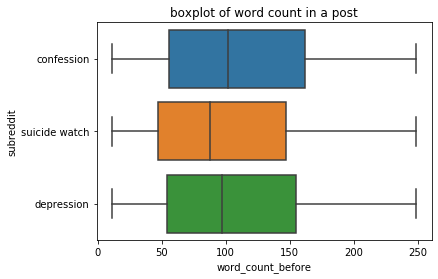

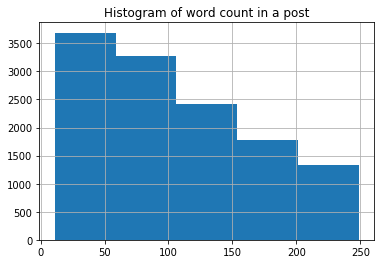

In [43]:
display(df.word_count_before.describe())
print('\n')
display(df.subreddit.value_counts())
print('\n')

plt.figure()
sns.boxplot(x = 'word_count_before', y = 'subreddit', data=df_drop)
plt.title('boxplot of word count in a post')
plt.show()

plt.figure()
df_drop.word_count_before.hist(bins =5)
plt.title('Histogram of word count in a post')
plt.show()